# 单链表  
## acwing单链表题目
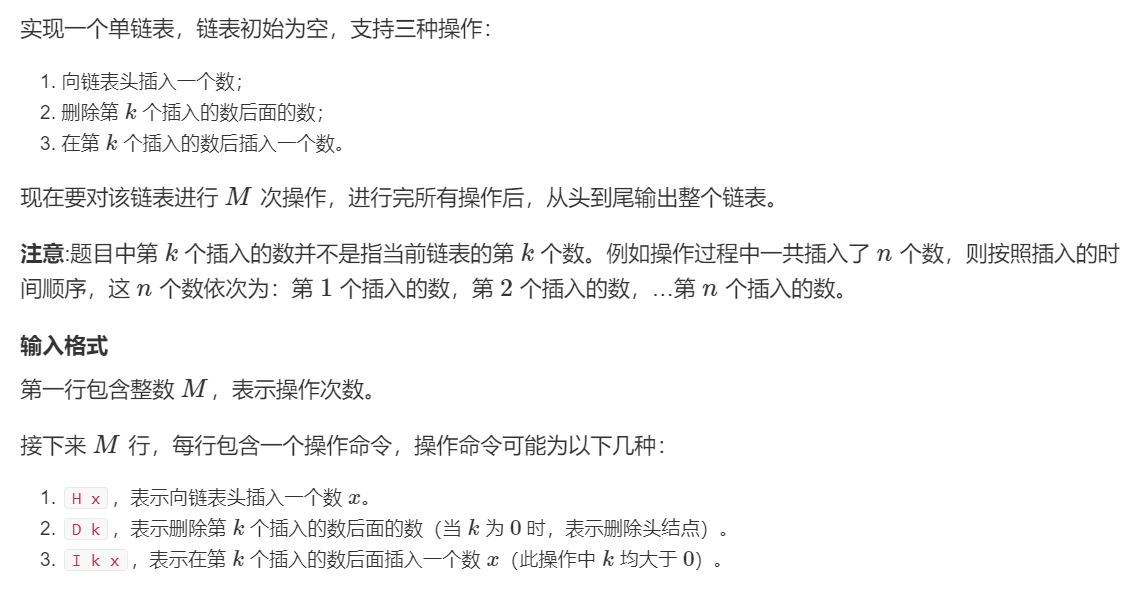  
```c
#include <iostream>

using namespace std;
const int N = 100010;
// 使用静态链表进行存储，e数组存储链表的值，ne用来存储下标，idx用来表示指针，head指向头节点
int e[N], ne[N], idx, head;

void init()
{
    head = -1, idx = 0;
}

//头插法
void insert_head(int x)
{
    e[idx] = x, ne[idx] = head, head = idx++;
}

//将x插入到下标是k的点的后面
void add(int k, int x)
{
    e[idx] = x, ne[idx] = ne[k], ne[k] = idx++;
}

//删除操作
void remove(int k)
{
    ne[k] = ne[ne[k]];
}

int main()
{
    int m;
    cin >> m;
    init();
    while(m--)
    {
        int k, x;
        char op;

        cin >> op;
        if(op == 'H')
        {
            cin >> x;
            insert_head(x);
        }else if(op == 'D')
        {
            cin >> k;
            if(!k) head = ne[head];
            else
            remove(k - 1);
        }else
        {
            cin >> k >> x;
            add(k - 1, x);
        }
    }

    for (int i = head; i != -1; i = ne[i]) cout << e[i] << ' ';
    cout << endl;
    return 0;
}
```  
# 双链表  
## acwing双链表题目  
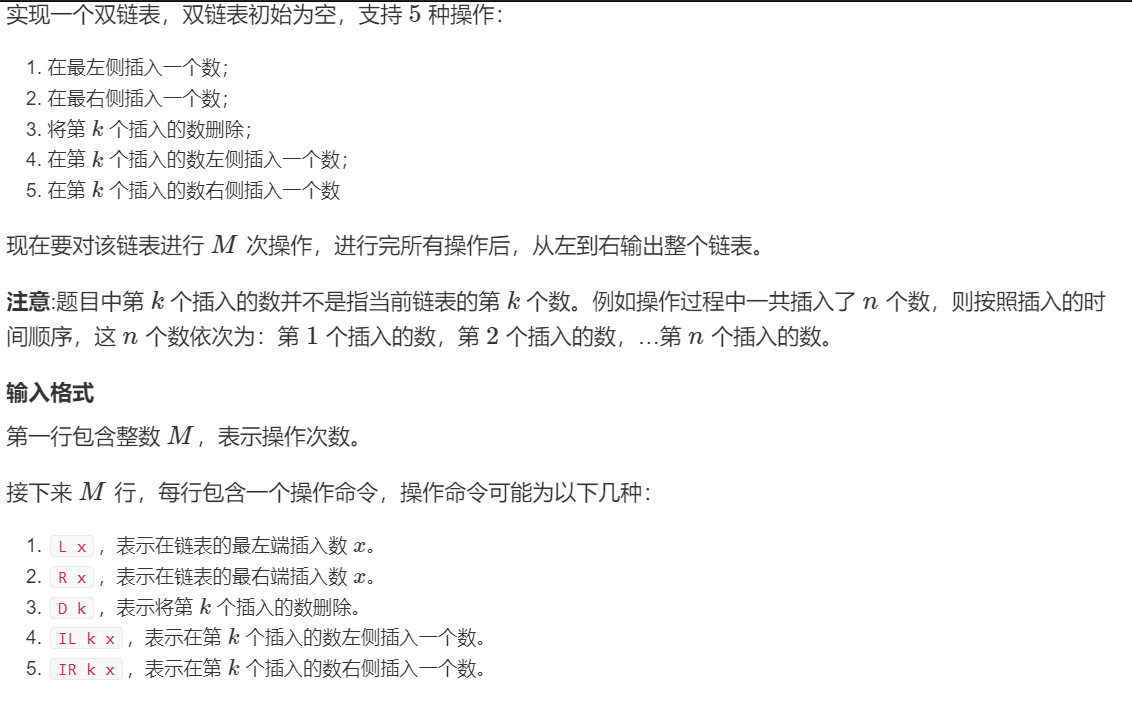  
```c
#include <iostream>
#include <cstring>
using namespace std;
const int N = 100010;
int e[N], l[N], r[N], idx;

void init()
{
    idx = 2;
    r[0] = 1, l[1] = 0;
    //0表示双链表的开头，1表示双链表的结尾，因此插入的元素从2开始存放
    memset(e, 0, sizeof(e));
}

void del(int k)
{
    r[l[k]] = r[k];
    l[r[k]] = l[k];
}

void insert_l(int k, int x)
{
    e[idx] = x;
    l[idx] = l[k];
    r[l[k]] = idx;
    r[idx] = k;
    l[k] = idx++;
}

void insert_r(int k, int x)
{
    e[idx] = x;
    r[idx] = r[k];
    l[idx] = k;
    l[r[k]] = idx;
    r[k] = idx++;
}

int main()
{
    int m;
    cin >> m;
    init();
    while(m--)
    {
        string op;
        cin >> op;
        int k, x;
        if(op == "L")
        {
            cin >> x;
            insert_r(0, x);
        }else if(op == "R")
        {
            cin >> x;
            insert_r(l[1], x);
        }else if(op == "D")
        {
            cin >> k;
            del(k + 1);
        }else if(op == "IL")
        {
            cin >> k >> x;
            // 代入k+1是因为第一个插入的数的下标是2，以此类推
            insert_l(k + 1, x);
        }else
        {
            cin >> k >> x;
            insert_r(k + 1, x);
        }
    }

    for(int i = r[0]; i != 1; i = r[i])
    cout << e[i] << " ";
    cout << endl;

    return 0;
}
```

# 模拟栈  
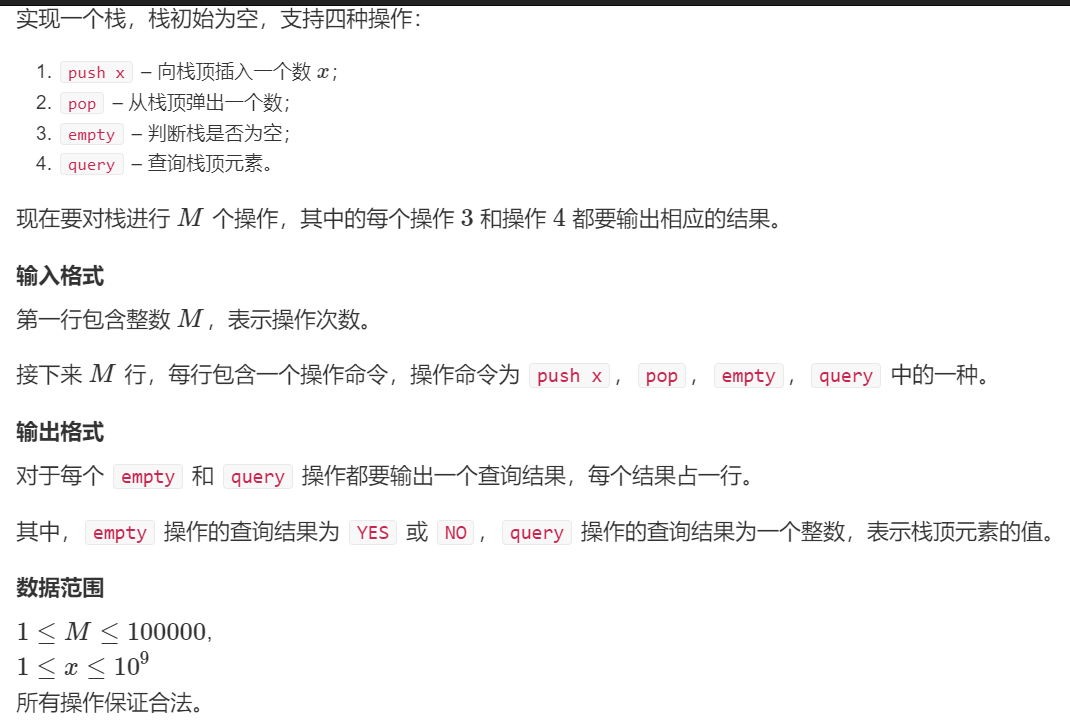  
## 代码如下  
```c
#include <iostream>

using namespace std;
const int N = 100010;

int m, e[N], idx;

void push(int x)
{
    e[idx++] = x;
}

int main()
{
    cin >> m;

    //初始化，栈顶指针为idx，指向栈顶元素的下一个元素
    idx = 0;

    while(m--)
    {
        int x;
        string op;
        cin >> op;
        if(op == "push")
        {
            cin >> x;
            push(x);
        }else if(op == "pop")
        {
            idx--;
        }else if(op == "empty")
        {
            if(idx == 0)
            cout << "YES" << endl;
            else
            cout << "NO" << endl;
        }else
        {
            cout << e[idx - 1] << endl;
        }
    }
    return 0;
}
```

# 表达式求值  
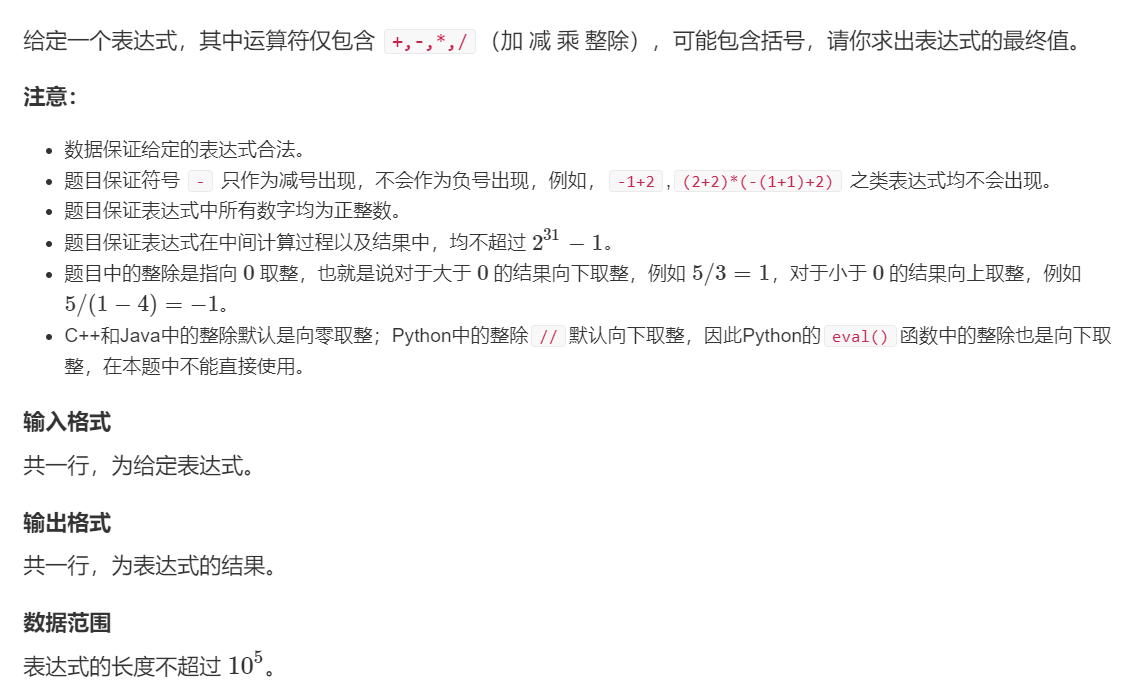  
## 代码如下  
```c
#include <iostream>
#include <stack>
#include <algorithm>
#include <unordered_map>

using namespace std;
const int N = 100010;

string s;
stack<char> op;
stack<int> num;

void eval()
{
    auto a = num.top();num.pop();
    auto b = num.top();num.pop();
    auto c = op.top();op.pop();
    int x;
    if(c == '+') x = b + a;
    else if(c == '-') x = b - a;
    else if(c == '*') x = b * a;
    else x = b / a;
    num.push(x);
}

int main()
{
    cin >> s;
    unordered_map<char, int> mp{{'+', 1}, {'-', 1}, {'*', 2}, {'/', 2}};
    for(int i = 0;i < s.size(); i++)
    {
        char c = s[i];
        if(isdigit(c))
        {
            int x = 0, j = i;
            while(j < s.size() && isdigit(s[j]))
            {
                x = x*10 + s[j++] - '0';
            }
            i = j - 1;
            num.push(x);
        }else if(c == '(') op.push(c);
        else if(c == ')') 
        {
            while(op.top() != '(') eval();
            op.pop();
        }else
        {
            while(op.size() && op.top() != '(' && mp[op.top()] >= mp[c]) eval();
            op.push(c);
        }
    }
    while(op.size()) eval();
    cout << num.top() << endl;

    return 0;
}
```